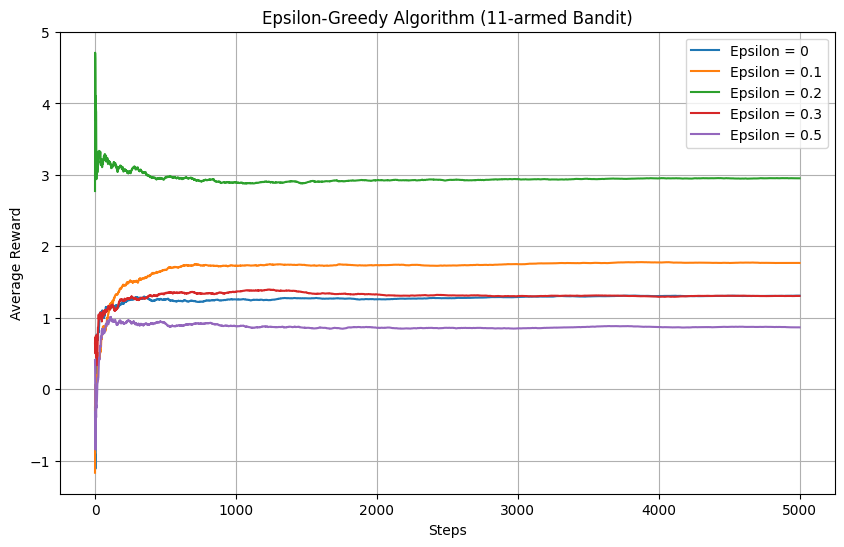

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, n_actions, action_values):
        self.n_actions = n_actions
        self.action_values = action_values

    def pull_arm(self, action):
        return np.random.normal(self.action_values[action], 1)

class EpsilonGreedyAgent:
    def __init__(self, epsilon, n_actions):
        self.epsilon = epsilon
        self.n_actions = n_actions
        self.action_values = np.zeros(n_actions)
        self.action_counts = np.zeros(n_actions)

    def choose_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_actions)
        else:
            return np.argmax(self.action_values)

    def update_action_value(self, action, reward):
        self.action_counts[action] += 1
        self.action_values[action] += (1 / self.action_counts[action]) * (reward - self.action_values[action])

def run_experiment(epsilon, n_steps):
    bandit = Bandit(11, np.random.normal(0, 1, 11))  # 11-armed bandit problem with action values drawn from a normal distribution
    agent = EpsilonGreedyAgent(epsilon, bandit.n_actions)
    rewards = []
    for _ in range(n_steps):
        action = agent.choose_action()
        reward = bandit.pull_arm(action)
        agent.update_action_value(action, reward)
        rewards.append(reward)
    return rewards

epsilons = [0, 0.1, 0.2, 0.3, 0.5]
n_steps = 5000

results = []
for epsilon in epsilons:
    rewards = run_experiment(epsilon, n_steps)
    results.append(rewards)

plt.figure(figsize=(10, 6))
for i, epsilon in enumerate(epsilons):
    plt.plot(np.cumsum(results[i]) / np.arange(1, n_steps + 1), label=f"Epsilon = {epsilon}")
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.title('Epsilon-Greedy Algorithm (11-armed Bandit)')
plt.legend()
plt.grid(True)
plt.show()
